## Writing functions in Python

Write your own function any time you think you might reuse a block of code, or for performing some task/function repeatedly throughout some class, activity, program, etc.

We can have a function that is 'hard coded' or does not require any *arguments*. This type of function will simply execute some set of actions in the same way every time.

In [1]:
# For example:

def happyBirthday():
    print('Happy birthday to you,')
    print('happy birthday to you,')
    print('happy birthday dear YOU!,')
    print('happy birthday to you.')

In [2]:
happyBirthday()

Happy birthday to you,
happy birthday to you,
happy birthday dear YOU!,
happy birthday to you.


However, most functions you will want to pass arguments to. Like this:

In [3]:
def happyBirthday2(name='You'):
    print('Happy birthday to you,')
    print('happy birthday to you,')
    print('happy birthday dear %s!,' % name)
    print('happy birthday to you.')

In [4]:
happyBirthday2(name='Sawyer') # Insert name of someone whose birthday is today :)

Happy birthday to you,
happy birthday to you,
happy birthday dear Sawyer!,
happy birthday to you.


User-defined functions in Python can take different types of arguments. You will see these terms in reference to function arguments (that are not mutually exclusive):

* Default arguments  
* Required arguments  
* Keyword arguments
* Positional arguments
* Variable number of arguments 

### Required arguments
If I tried to run my second birthday function like this:

In [5]:
happyBirthday2() #with no argument passed, it will return an error

Happy birthday to you,
happy birthday to you,
happy birthday dear You!,
happy birthday to you.


This is because a variable called "name" needs to be passed to the function in order for it to work. This means "name" is a required argument.

Most of the time we want to set up the total number of arguments in the definition of the function *and* we will want to set up default arguments whenever possible (so as to have the function work and spit out *something*).

A default argument is where you pass *in the definition of the function* a default variable which a user may or may not overwrite. In our example above, we could have said:

`def happyBirthday2(name=YOU):`

...more on default arguments in a bit...

Let's construct a simple function as another example...

In [6]:
#Let's write our own division function
def func_divide(arg1, arg2):
    y = arg1 / arg2
    return(y)

In [7]:
func_divide(9,3.2)

2.8125

Here arg1 and arg2 are **required** arguments with no default values.

Python is smart and will accept ANY argument, but it will fail, of course, if you try to pass in some argument that is the wrong type:

In [8]:
func_divide('two', 'three')

TypeError: unsupported operand type(s) for /: 'str' and 'str'

You can generate better (read: more useful) error messages by coding them into your functions. This is especially important if you are sharing code or writing code for a program that others will use.

The most "correct" way to do this is with try/except blocks. In the try block, you run the code as it should work assuming no issues. In the except block, you "catch" exceptions that were thrown in the try block. You can specify the exception, write your own, or just pass whatever python has found.

Generally, when we write functions to avoid errors, we want to test/account for all possible conditions. By thinking of edge cases, we can make more robust, modular functions.

When dealing with exceptions, we can use 2 approaches: "Look before you leap" or "Easier to ask for forgiveness then permission". LBYL checks everything to stop errors from happening, while EAFP assumes input is correct and handles errors if it isn't.

In Python, both approaches work well and since we will not be writing full Python programs in this course, we will more or less combine techniques.

Here are 3 different ways of handling the same 2 errors. 

In [12]:
class InvalidInputError(Exception):
    pass

def func_divide(numerator, denominator):
    try:
        if (type(numerator) == int or type(numerator) == float) and (type(denominator) == int or type(denominator) == float):
            y = numerator / denominator
            return(y)
        else:
            raise InvalidInputError('Arguments must be of type int or float')
    except InvalidInputError as e:
        print(e)
    except ZeroDivisionError:
        print('Denominator cannot be 0')

In [13]:
func_divide('Jerry','Lewis')

Arguments must be of type int or float


In [16]:
def func_divide(numerator, denominator):
    try:
        y = numerator / denominator
        return(y)
    except TypeError:
        print('Arguments must be of type int or float')
    except ZeroDivisionError:
        print('Denominator cannot be 0')

In [17]:
func_divide('Jerry','Lewis')

Arguments must be of type int or float


In [18]:
def func_divide(numerator, denominator):
    if (type(numerator) == int or type(numerator) == float) and (type(denominator) == int or type(denominator) == float):
        if denominator != 0:
            y = numerator / denominator
            return(y)
        else:
            print('Denominator cannot be 0')
    else:
        print('Arguments must be of type int or float')

In [19]:
func_divide('Jerry','Lewis')

Arguments must be of type int or float


### Keyword arguments

Keyword arguments allow the user to use the name of the "placeholder argument" in order to pass assignment to the variables regardless of the order of the arguments.

For example, `func_divide` is really supposed to divide the first number by the second number. Or we could think of those as a numerator and denominator

In [11]:
func_divide(9,3)

3.0

If I pass the same numbers in reverse order, I will not get the expected output.

In [12]:
func_divide(3,9)

0.3333333333333333

However, this requires me to *remember* the order of the arguments. Arg1 = numerator, Arg2 = denominator.  However, one can provide keywords to override this problem:

In [13]:
func_divide(denominator=3, numerator=9)

3.0

For this reason, it's very useful if you give your "placeholder" arguments meaningful names. In CS these are referred to as *identifiers* (which is just robot speak for "name")

### Default arguments
In many cases, you may run a function where more often than not you really only want to manipulate *some* of the argument variables, but nevertheless would like to have the option of manipulating all of them.

In this case, you likely will want to set up default arguments. Default values indicate that the function argument will take that value if no argument value is passed to overwrite it during the function call.

For example, perhaps we want to generate a function that plots a sinusoid. (You've all done this already). 

So we could define our function like this:

In [14]:
def plotSine(x, y):
    import matplotlib.pyplot as plt
    import numpy as np
    f = plt.plot(x, np.sin(y))
    return(f)

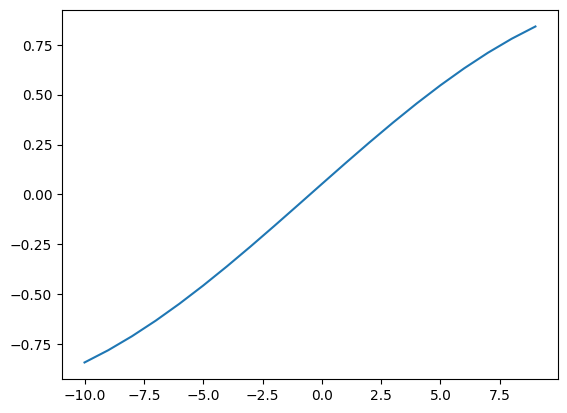

In [15]:
import numpy as np
xvals = np.arange(-10,10)
yvals = np.linspace(-1,1,20)

plotSine(xvals, yvals)

Notice that each of the two arguments now currently *mandatory*. That is, the user *must* pass two arguments. But like the actual plt.plot() funcion, we could create default x-axis values and only make the y values mandatory.

In this case, we can set up default values for the "x" argument, so that it's easier for the user to use the function and just pass one variable:

In [16]:
def plotSine(y, x=None):
    import matplotlib.pyplot as plt
    import numpy as np
    if x is None:
        indices = np.arange(0, len(y))
    else:
        indices = x
    f = plt.plot(indices, np.sin(y))
    return(f)

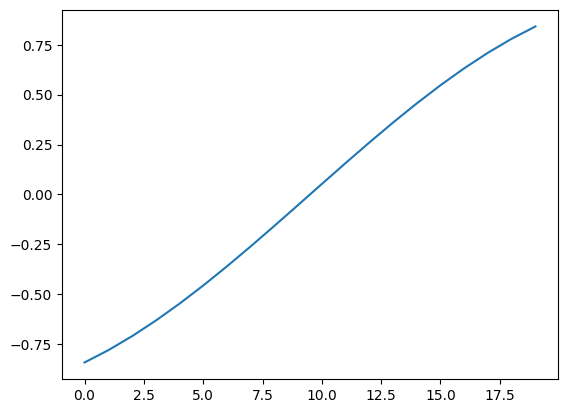

In [17]:
plotSine(yvals)

Notice that in python coding style it is required to put mandatory arguments before optional or default arguments, so in this case we put "y" before "x".

Of course we can always overwrite the default x values by simply passing the values either in the correct positions (y, x) or else by explicitly telling the function which arguments we are passing:

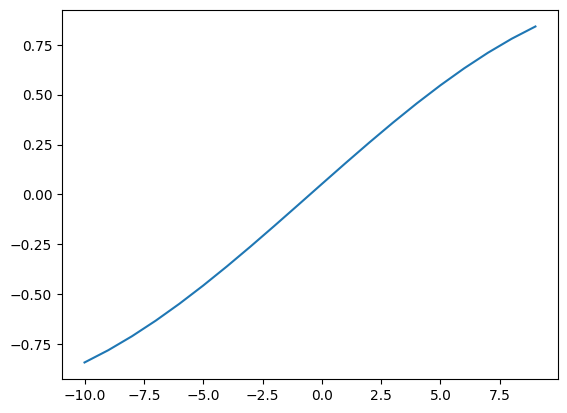

In [18]:
plotSine(x=xvals, y=yvals)

### Variable number of arguments

occasionally you won't know how many total arguments you need, or, you'll know that sometimes your function takes 3 arguments and sometimes 4. In this case you need variable # of arguments:

In [19]:
def varLenArgFunc(*varvallist):
    #asterisk converts all passed variables as a list. Can be combined with regular argument variables.
    print ("The Output is: ")
    for varval in varvallist:
       print (varval)
    return;   

In [20]:
varLenArgFunc(55)

The Output is: 
55


In [21]:
varLenArgFunc(50,60,70,80)

The Output is: 
50
60
70
80
